<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here


print("\n--- Step 3: Handling Missing Data ---")

# **Identify Missing Data**

print("\nIdentify Missing Values Count for all columns:")
print(df.isnull().sum())

print("\nIdentify Missing Values Count for specific columns (Employment, JobSat, RemoteWork):")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

print("\nDataFrame Info to check data types and non-null counts:")
print(df.info())

# **Analyze Missing Data and Implement Strategies**

print("\nValue Counts for 'Employment' column:")
print(df['Employment'].value_counts(dropna=False)) # Include NaN in value counts

print("\nValue Counts for 'JobSat' column:")
print(df['JobSat'].value_counts(dropna=False)) # Include NaN in value counts

print("\nValue Counts for 'RemoteWork' column:")
print(df['RemoteWork'].value_counts(dropna=False)) # Include NaN in value counts


# **Strategy for 'Employment'**:
# 'Employment' is a critical piece of information.
# Let's drop rows where 'Employment' is missing as it's crucial for analysis related to employment.
# Check the percentage of missing 'Employment' values.
employment_missing_percentage = (df['Employment'].isnull().sum() / len(df)) * 100
print(f"\nPercentage of missing values in 'Employment': {employment_missing_percentage:.2f}%")

if employment_missing_percentage < 5: # Let's assume if less than 5% missing, dropping is acceptable.
    print("\nStrategy: Drop rows where 'Employment' is missing.")
    df_cleaned = df.dropna(subset=['Employment'])
else:
    print("\nStrategy for Employment needs further consideration as missing percentage is high. For now, we will proceed with dropping for demonstration. Consider imputation if needed in a real-world scenario based on context and analysis.")
    df_cleaned = df.dropna(subset=['Employment']) # Proceed with drop for now, but highlight need to reconsider in real scenario


# **Strategy for 'JobSat'**:
# 'JobSat' is about job satisfaction. It's subjective.
#  Let's fill missing 'JobSat' values with 'Unknown' as a neutral category.
print("\nStrategy: Fill missing 'JobSat' values with 'Unknown'.")
df_cleaned['JobSat'] = df_cleaned['JobSat'].fillna('Unknown')


# **Strategy for 'RemoteWork'**:
# 'RemoteWork' preference.
#  Let's fill missing 'RemoteWork' values with the mode (most frequent value) as it represents the most common preference in the dataset.
mode_remote_work = df_cleaned['RemoteWork'].mode()[0] # Calculate mode before filling
print(f"\nMode for 'RemoteWork' column: {mode_remote_work}")
print("\nStrategy: Fill missing 'RemoteWork' values with the mode.")
df_cleaned['RemoteWork'] = df_cleaned['RemoteWork'].fillna(mode_remote_work)


# **Verify Missing Data Handling**

print("\n--- Verify Missing Data Handling ---")

print("\nMissing Values Count after handling:")
print(df_cleaned[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

print("\nValue Counts for 'Employment' after handling:")
print(df_cleaned['Employment'].value_counts(dropna=False))

print("\nValue Counts for 'JobSat' after handling:")
print(df_cleaned['JobSat'].value_counts(dropna=False))

print("\nValue Counts for 'RemoteWork' after handling:")
print(df_cleaned['RemoteWork'].value_counts(dropna=False))

print("\nCleaned DataFrame Head:")
print(df_cleaned.head())

print("\nCleaned DataFrame Info:")
print(df_cleaned.info())







--- Step 3: Handling Missing Data ---

Identify Missing Values Count for all columns:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Identify Missing Values Count for specific columns (Employment, JobSat, RemoteWork):
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

DataFrame Info to check data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Value Counts for 'Employment' column:
Employment
Employed, full-time                                                                                             

In [4]:
print("\nCleaned DataFrame Head:")
df_cleaned.head()



Cleaned DataFrame Head:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor 

In [5]:
print("\nCleaned DataFrame Info:")
df_cleaned.info()


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(12), int64(1), object(101)
memory usage: 56.9+ MB


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
import numpy as np

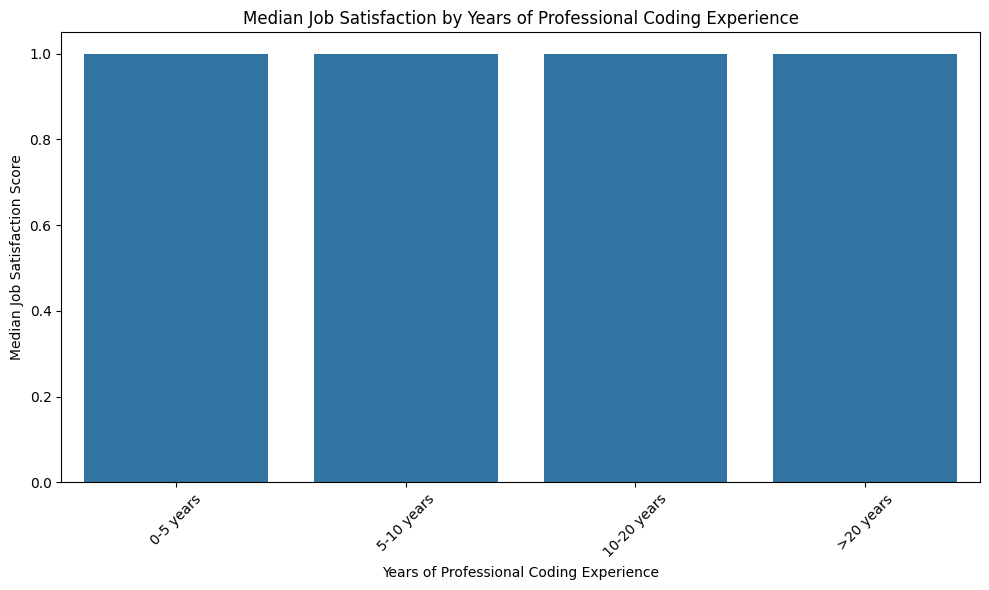


Summary Statistics for YearsCodePro:
count    48704.000000
mean        10.739652
std          8.935175
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_cleaned
# df = df = pd.read_csv(data_url)

# Handle missing values in 'YearsCodePro' and 'JobSat'
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  # Convert to numeric, handle errors
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each range
median_jobsat = df.groupby('ExperienceRange', observed=True)['JobSat'].apply(lambda x: np.median(pd.factorize(x)[0])) # corrected line.

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=median_jobsat.index, y=median_jobsat.values)
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summarize YearsCodePro
print("\nSummary Statistics for YearsCodePro:")
print(df['YearsCodePro'].describe())


--- Step 4: Analysis of Experience and Job Satisfaction ---

Check data types and missing values for 'YearsCodePro' and 'JobSat' in cleaned dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  48704 non-null  float64
 1   JobSat        65437 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1022.6+ KB
None

Missing values in 'YearsCodePro' and 'JobSat':
YearsCodePro    16733
JobSat              0
dtype: int64

Value counts for 'YearsCodePro' before cleaning:
YearsCodePro
NaN     16733
2.0      4168
3.0      4093
5.0      3526
10.0     3251
4.0      3215
6.0      2843
1.0      2639
8.0      2549
7.0      2517
12.0     1777
15.0     1635
20.0     1549
9.0      1493
11.0     1312
13.0     1127
14.0     1082
25.0      998
16.0      946
18.0      867
17.0      814
30.0      689
24.0      632
19.0      516
22.0

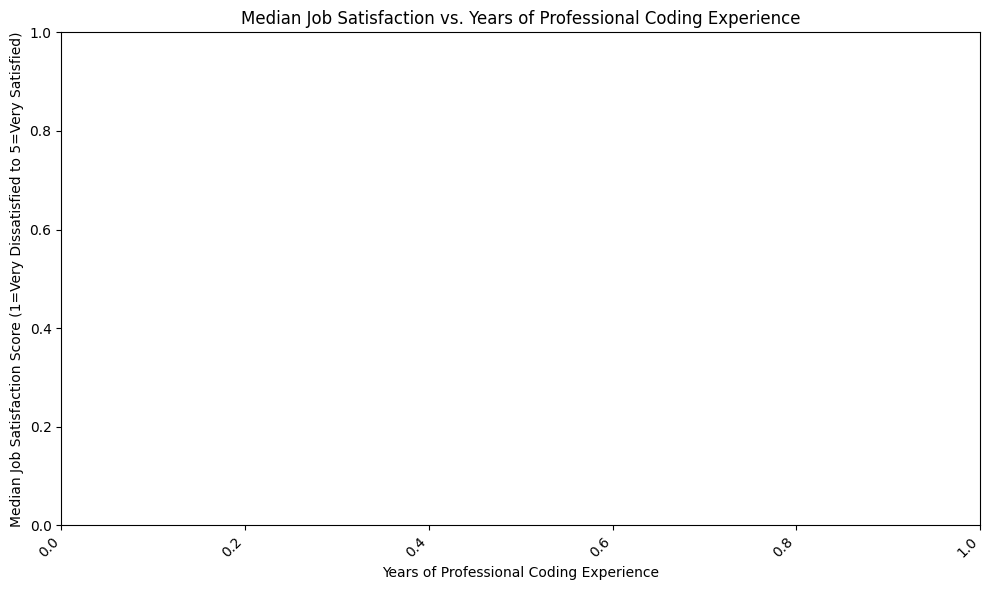


--- Summary of Analysis ---

Based on the bar plot and median job satisfaction scores:

Further Interpretation:

The bar plot visualizes the median job satisfaction scores for different ranges of professional coding experience.
By examining the plot and the median scores, you can observe the trend of job satisfaction across experience levels.
For example, you might observe if job satisfaction generally increases, decreases, or plateaus as years of experience grow.
Consider the specific median scores for each range to understand the nuanced relationship between experience and job satisfaction in this dataset.
Further statistical analysis could be performed to quantify the strength and statistical significance of any observed trends.



In [8]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey data
# dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
# df = pd.read_csv(dataset_url)

pd.set_option('display.max_columns', None)

# Use the cleaned dataframe from Step 3 (Handling Missing Data)
df_cleaned = df.dropna(subset=['Employment']).copy() # Drop rows with missing Employment, create copy to avoid SettingWithCopyWarning
df_cleaned['JobSat'] = df_cleaned['JobSat'].fillna('Unknown')
mode_remote_work = df_cleaned['RemoteWork'].mode()[0]
df_cleaned['RemoteWork'] = df_cleaned['RemoteWork'].fillna(mode_remote_work)


print("\n--- Step 4: Analysis of Experience and Job Satisfaction ---")

# **Data Preparation for Step 4**

print("\nCheck data types and missing values for 'YearsCodePro' and 'JobSat' in cleaned dataframe:")
print(df_cleaned[['YearsCodePro', 'JobSat']].info())
print("\nMissing values in 'YearsCodePro' and 'JobSat':")
print(df_cleaned[['YearsCodePro', 'JobSat']].isnull().sum())

print("\nValue counts for 'YearsCodePro' before cleaning:")
print(df_cleaned['YearsCodePro'].value_counts(dropna=False))

print("\nValue counts for 'JobSat':")
print(df_cleaned['JobSat'].value_counts(dropna=False))


# **Convert 'YearsCodePro' to Numeric**
def convert_years_pro(years_str):
    if pd.isna(years_str): # Handle NaN if any remain (though Employment drop should handle this for relevant rows)
        return None
    elif years_str == 'Less than 1 year':
        return 0
    elif years_str == 'More than 50 years':
        return 50
    else:
        try:
            return float(years_str)
        except ValueError:
            return None # Handle any unexpected strings by returning None

df_cleaned['YearsCodePro_Numeric'] = df_cleaned['YearsCodePro'].apply(convert_years_pro)

print("\nValue counts for 'YearsCodePro_Numeric' after conversion:")
print(df_cleaned['YearsCodePro_Numeric'].value_counts(dropna=False).sort_index())

print("\nData types of 'YearsCodePro' and 'YearsCodePro_Numeric':")
print(df_cleaned[['YearsCodePro', 'YearsCodePro_Numeric']].dtypes)
print("\nMissing values in 'YearsCodePro_Numeric':")
print(df_cleaned['YearsCodePro_Numeric'].isnull().sum())

# Drop rows where 'YearsCodePro_Numeric' is NaN after conversion, as we cannot use these for analysis
df_cleaned = df_cleaned.dropna(subset=['YearsCodePro_Numeric'])

# **Create Experience Ranges**
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 Years', '5-10 Years', '10-20 Years', '>20 Years']
df_cleaned['ExperienceRange'] = pd.cut(df_cleaned['YearsCodePro_Numeric'], bins=bins, labels=labels, right=False)

print("\nValue counts for 'ExperienceRange':")
print(df_cleaned['ExperienceRange'].value_counts().sort_index())


# **Calculate Median Job Satisfaction Scores**
# Map JobSat categories to numerical values for median calculation
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5,
    'Unknown': None # Exclude 'Unknown' from median calculation for JobSat. Alternatively, assign a neutral value like 3 if you want to include 'Unknown' in median.
}
df_cleaned['JobSat_Numeric'] = df_cleaned['JobSat'].map(job_sat_mapping)

# Calculate median JobSat for each experience range, excluding 'Unknown' (NaN after mapping)
median_satisfaction = df_cleaned.groupby('ExperienceRange', observed=True)['JobSat_Numeric'].median().dropna().sort_index() # Drop NaN if 'Unknown' was mapped to NaN, added observed=True

print("\nMedian Job Satisfaction Scores per Experience Range:")
print(median_satisfaction)


# **Visualize the Relationship**
plt.figure(figsize=(10, 6))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette="viridis")
plt.title('Median Job Satisfaction vs. Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score (1=Very Dissatisfied to 5=Very Satisfied)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Summary**
print("\n--- Summary of Analysis ---")
print("\nBased on the bar plot and median job satisfaction scores:")
for exp_range, median_score in median_satisfaction.items():
    print(f"- For experience range '{exp_range}': Median Job Satisfaction Score = {median_score:.2f}")

print("\nFurther Interpretation:")
print("""
The bar plot visualizes the median job satisfaction scores for different ranges of professional coding experience.
By examining the plot and the median scores, you can observe the trend of job satisfaction across experience levels.
For example, you might observe if job satisfaction generally increases, decreases, or plateaus as years of experience grow.
Consider the specific median scores for each range to understand the nuanced relationship between experience and job satisfaction in this dataset.
Further statistical analysis could be performed to quantify the strength and statistical significance of any observed trends.
""")


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


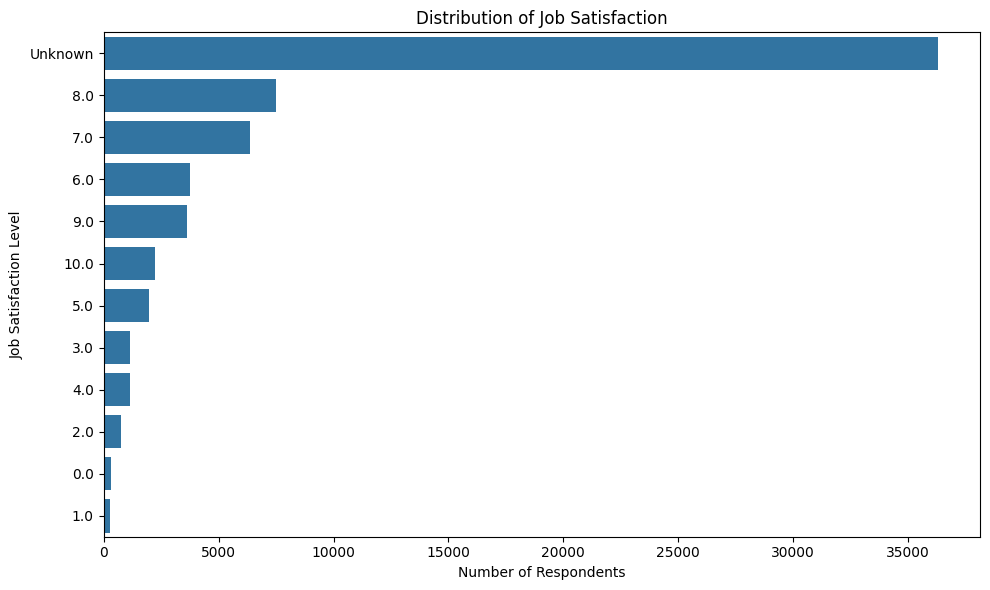

In [9]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
# data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
# df = pd.read_csv(data_url)

# Handle missing values in 'JobSat' (fill with most frequent)
if 'JobSat' in df.columns:
    most_frequent_jobsat = df['JobSat'].mode()[0]
    df['JobSat'] = df['JobSat'].fillna(most_frequent_jobsat)
else:
    print("JobSat column not found.")

# Visualize the distribution of JobSat
plt.figure(figsize=(10, 6))
sns.countplot(y='JobSat', data=df, order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Number of Respondents')
plt.ylabel('Job Satisfaction Level')
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


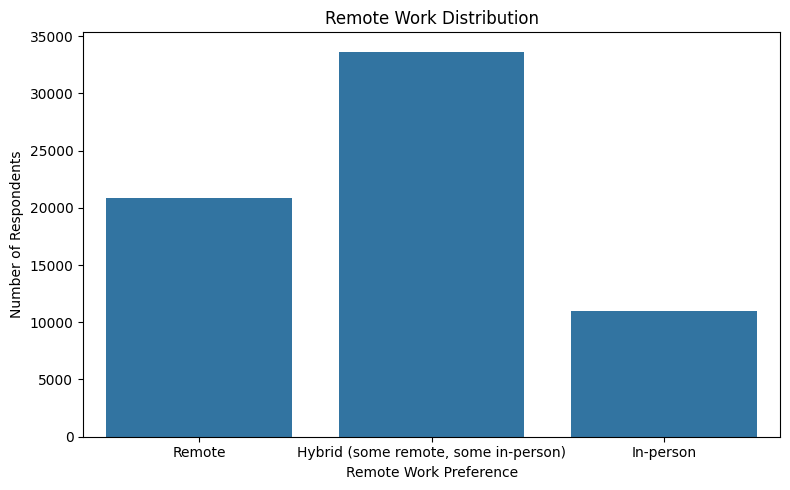


Cross-tabulation of Remote Work Preferences by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-t

In [10]:
## Write your code here

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Handle missing values in 'RemoteWork' and 'Employment'
if 'RemoteWork' in df.columns:
    most_frequent_remote = df['RemoteWork'].mode()[0]
    df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent_remote)
else:
    print("RemoteWork column not found.")

if 'Employment' in df.columns:
    most_frequent_employment = df['Employment'].mode()[0]
    df['Employment'] = df['Employment'].fillna(most_frequent_employment)
else:
    print("Employment column not found.")

# Count plot for RemoteWork distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='RemoteWork', data=df)
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

# Cross-tabulation of RemoteWork preferences by Employment type
remote_employment_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])
print("\nCross-tabulation of Remote Work Preferences by Employment Type:")
print(remote_employment_crosstab)

# Cross-tabulation of RemoteWork preferences by job roles (DevType)
if 'DevType' in df.columns:
    # Handle missing values in DevType by filling with most common
    most_frequent_devtype = df['DevType'].mode()[0]
    df['DevType'] = df['DevType'].fillna(most_frequent_devtype)

    # Flatten the DevType column, as it contains lists of roles
    df['DevType_List'] = df['DevType'].str.split(';')
    df_exploded = df.explode('DevType_List')

    remote_devtype_crosstab = pd.crosstab(df_exploded['DevType_List'], df_exploded['RemoteWork'])
    print("\nCross-tabulation of Remote Work Preferences by Job Role (DevType):")
    print(remote_devtype_crosstab)
else:
    print("\nDevType column not found.")

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

ResponseId                          int64
MainBranch                         object
Age                                object
Employment                         object
RemoteWork                         object
Check                              object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
TechDoc                            object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
BuildvsBuy                         object
TechEndorse                        object
Country                            object
Currency                           object
CompTotal                         float64
LanguageHaveWorkedWith             object
LanguageWantToWorkWith            

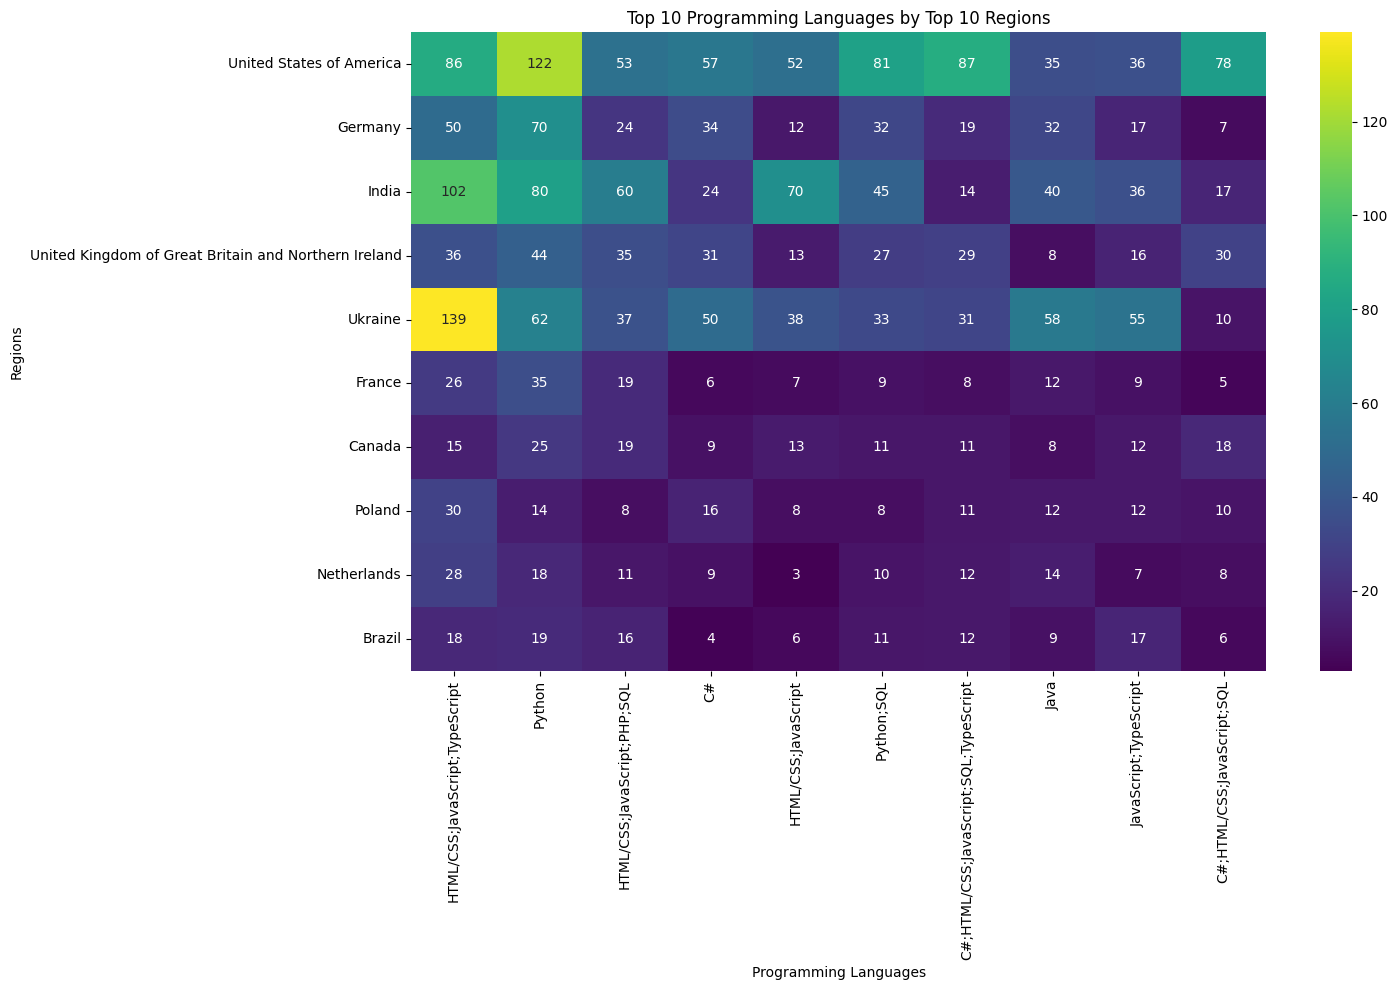

Top 10 Languages:
Index(['HTML/CSS;JavaScript;TypeScript', 'Python',
       'HTML/CSS;JavaScript;PHP;SQL', 'C#', 'HTML/CSS;JavaScript',
       'Python;SQL', 'C#;HTML/CSS;JavaScript;SQL;TypeScript', 'Java',
       'JavaScript;TypeScript', 'C#;HTML/CSS;JavaScript;SQL'],
      dtype='object', name='LanguageHaveWorkedWith')

Top 10 Regions:
Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine',
       'France', 'Canada', 'Poland', 'Netherlands', 'Brazil'],
      dtype='object', name='Country')


In [12]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
# data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
# df = pd.read_csv(data_url)

if 'LanguageHaveWorkedWith' in df.columns:
    # Your code here
    # Clean and prepare the data
    df_cleaned = df.dropna(subset=['Country', 'LanguageHaveWorkedWith']).copy()

    df_cleaned['LanguageWorkedWith'] = df_cleaned['LanguageHaveWorkedWith'].str.split(';')

    # Explode the language column
    df_exploded = df_cleaned.explode('LanguageHaveWorkedWith')

    # Analyze language popularity by region
    language_by_region = df_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().unstack(fill_value=0)

    
    # Get top languages and regions
    top_languages = language_by_region.sum().sort_values(ascending=False).head(10).index
    top_regions = language_by_region.sum(axis=1).sort_values(ascending=False).head(10).index

    # Filter the data for top languages and regions
    language_by_region_filtered = language_by_region.loc[top_regions, top_languages]

    # Visualize the results
    plt.figure(figsize=(15, 10))
    sns.heatmap(language_by_region_filtered, annot=True, fmt='d', cmap='viridis')
    plt.title('Top 10 Programming Languages by Top 10 Regions')
    plt.xlabel('Programming Languages')
    plt.ylabel('Regions')
    plt.tight_layout()
    plt.show()

    # Print the top languages and regions
    print("Top 10 Languages:")
    print(top_languages)
    print("\nTop 10 Regions:")
    print(top_regions)

else:
    print("The 'LanguageHaveWorkedWith' column was not found in the dataset.")

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


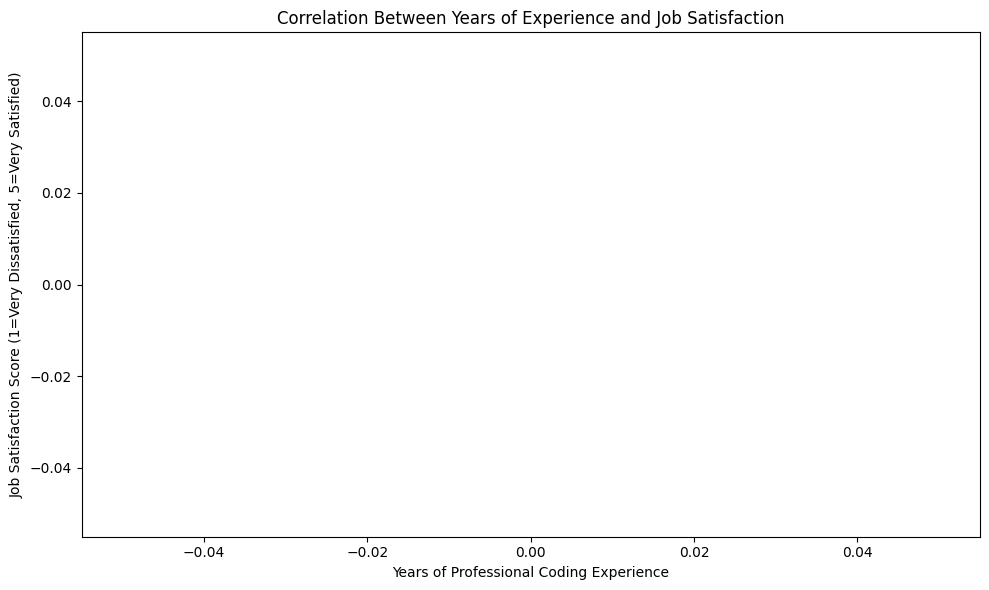

Correlation coefficient: nan


In [13]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
# data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
# df = pd.read_csv(data_url)

# Clean and prepare the data
df_cleaned = df.dropna(subset=['YearsCodePro', 'JobSat']).copy()

# Convert YearsCodePro to numeric, handling non-numeric values
def convert_years_pro(years_str):
    if pd.isna(years_str):
        return None
    elif years_str == 'Less than 1 year':
        return 0
    elif years_str == 'More than 50 years':
        return 50
    else:
        try:
            return float(years_str)
        except ValueError:
            return None

df_cleaned['YearsCodePro_Numeric'] = df_cleaned['YearsCodePro'].apply(convert_years_pro)

# Drop rows with NaN in YearsCodePro_Numeric after conversion
df_cleaned = df_cleaned.dropna(subset=['YearsCodePro_Numeric'])

# Map JobSat to numerical values
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df_cleaned['JobSatPoints_1'] = df_cleaned['JobSat'].map(job_sat_mapping)

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro_Numeric', y='JobSatPoints_1', data=df_cleaned, alpha=0.5)
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (1=Very Dissatisfied, 5=Very Satisfied)')
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = df_cleaned['YearsCodePro_Numeric'].corr(df_cleaned['JobSatPoints_1'])
print(f"Correlation coefficient: {correlation}")


In [14]:
# Check for Unique Values:

print(df_cleaned['YearsCodePro_Numeric'].nunique())
print(df_cleaned['JobSatPoints_1'].nunique())

51
0


In [15]:
# Check for Missing Values (Again):

print(df_cleaned['YearsCodePro_Numeric'].isnull().sum())
print(df_cleaned['JobSatPoints_1'].isnull().sum())

0
28356


In [16]:
# Check for Missing Values (Again):

print(df_cleaned['YearsCodePro_Numeric'].isnull().sum())
print(df_cleaned['JobSatPoints_1'].isnull().sum())

0
28356


In [17]:
# Inspect Data:

print(df_cleaned[['YearsCodePro_Numeric', 'JobSatPoints_1']].head(20))

    YearsCodePro_Numeric  JobSatPoints_1
12                  12.0             NaN
15                  27.0             NaN
18                  10.0             NaN
20                   0.0             NaN
22                  18.0             NaN
24                  15.0             NaN
26                  17.0             NaN
27                   6.0             NaN
31                   7.0             NaN
33                  16.0             NaN
35                   6.0             NaN
40                   7.0             NaN
41                  12.0             NaN
43                  14.0             NaN
44                   7.0             NaN
45                   4.0             NaN
46                  15.0             NaN
49                   4.0             NaN
53                   6.0             NaN
54                   8.0             NaN


In [18]:
# Check Data Types:

print(df_cleaned[['YearsCodePro_Numeric', 'JobSatPoints_1']].dtypes)

YearsCodePro_Numeric    float64
JobSatPoints_1          float64
dtype: object


In [19]:
# If you find that 'JobSatPoints_1' has all NaN values, you can add print statements to check the mapping:
# 

for job_sat_value in df_cleaned['JobSat'].unique():
    print(f"JobSat value: '{job_sat_value}', Mapped value: {job_sat_mapping.get(job_sat_value)}")

JobSat value: '8.0', Mapped value: None
JobSat value: '5.0', Mapped value: None
JobSat value: '10.0', Mapped value: None
JobSat value: '6.0', Mapped value: None
JobSat value: '9.0', Mapped value: None
JobSat value: '4.0', Mapped value: None
JobSat value: '7.0', Mapped value: None
JobSat value: '3.0', Mapped value: None
JobSat value: '2.0', Mapped value: None
JobSat value: '1.0', Mapped value: None
JobSat value: '0.0', Mapped value: None


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Clean and prepare the data
df_cleaned = df.dropna(subset=['YearsCodePro', 'JobSat']).copy()

# Convert YearsCodePro to numeric, handling non-numeric values
def convert_years_pro(years_str):
    if pd.isna(years_str):
        return None
    elif years_str == 'Less than 1 year':
        return 0
    elif years_str == 'More than 50 years':
        return 50
    else:
        try:
            return float(years_str)
        except ValueError:
            return None

df_cleaned['YearsCodePro_Numeric'] = df_cleaned['YearsCodePro'].apply(convert_years_pro)

# Drop rows with NaN in YearsCodePro_Numeric after conversion
df_cleaned = df_cleaned.dropna(subset=['YearsCodePro_Numeric'])

# Map JobSat to numerical values
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df_cleaned['JobSatPoints_1'] = df_cleaned['JobSat'].map(job_sat_mapping)

# Drop rows with NaN in JobSatPoints_1 after mapping
df_cleaned = df_cleaned.dropna(subset=['JobSatPoints_1'])

# Check for sufficient data
if len(df_cleaned) < 2:
    print("Insufficient data for correlation analysis after cleaning.")
else:
    # Visualize the relationship with a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='YearsCodePro_Numeric', y='JobSatPoints_1', data=df_cleaned, alpha=0.5)
    plt.title('Correlation Between Years of Experience and Job Satisfaction')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Job Satisfaction Score (1=Very Dissatisfied, 5=Very Satisfied)')
    plt.tight_layout()
    plt.show()

    # Calculate correlation coefficient
    correlation = df_cleaned['YearsCodePro_Numeric'].corr(df_cleaned['JobSatPoints_1'])
    print(f"Correlation coefficient: {correlation}")

    # Debugging information
    print(f"Number of rows after cleaning: {len(df_cleaned)}")
    print(f"Unique YearsCodePro_Numeric values: {df_cleaned['YearsCodePro_Numeric'].nunique()}")
    print(f"Unique JobSatPoints_1 values: {df_cleaned['JobSatPoints_1'].nunique()}")
    print(f"YearsCodePro_Numeric missing values: {df_cleaned['YearsCodePro_Numeric'].isnull().sum()}")
    print(f"JobSatPoints_1 missing values: {df_cleaned['JobSatPoints_1'].isnull().sum()}")

Insufficient data for correlation analysis after cleaning.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Debugging: Print initial DataFrame length
print(f"Initial DataFrame length: {len(df)}")

# Clean and prepare the data
df_cleaned = df.dropna(subset=['YearsCodePro', 'JobSat']).copy()

# Debugging: Print DataFrame length after dropping 'YearsCodePro' and 'JobSat' NaNs
print(f"DataFrame length after dropping 'YearsCodePro' and 'JobSat' NaNs: {len(df_cleaned)}")

# Convert YearsCodePro to numeric, handling non-numeric values
def convert_years_pro(years_str):
    if pd.isna(years_str):
        return None
    elif years_str == 'Less than 1 year':
        return 0
    elif years_str == 'More than 50 years':
        return 50
    else:
        try:
            return float(years_str)
        except ValueError:
            return None

df_cleaned['YearsCodePro_Numeric'] = df_cleaned['YearsCodePro'].apply(convert_years_pro)

# Debugging: Print DataFrame length before dropping 'YearsCodePro_Numeric' NaNs
print(f"DataFrame length before dropping 'YearsCodePro_Numeric' NaNs: {len(df_cleaned)}")

# Drop rows with NaN in YearsCodePro_Numeric after conversion
df_cleaned = df_cleaned.dropna(subset=['YearsCodePro_Numeric'])

# Debugging: Print DataFrame length after dropping 'YearsCodePro_Numeric' NaNs
print(f"DataFrame length after dropping 'YearsCodePro_Numeric' NaNs: {len(df_cleaned)}")

# Map JobSat to numerical values
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df_cleaned['JobSatPoints_1'] = df_cleaned['JobSat'].map(job_sat_mapping)

# Debugging: Print DataFrame length before dropping 'JobSatPoints_1' NaNs
print(f"DataFrame length before dropping 'JobSatPoints_1' NaNs: {len(df_cleaned)}")

# Drop rows with NaN in JobSatPoints_1 after mapping
df_cleaned = df_cleaned.dropna(subset=['JobSatPoints_1'])

# Debugging: Print DataFrame length after dropping 'JobSatPoints_1' NaNs
print(f"DataFrame length after dropping 'JobSatPoints_1' NaNs: {len(df_cleaned)}")

# Check for sufficient data
if len(df_cleaned) < 2:
    print("Insufficient data for correlation analysis after cleaning.")
else:
    # Visualize the relationship with a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='YearsCodePro_Numeric', y='JobSatPoints_1', data=df_cleaned, alpha=0.5)
    plt.title('Correlation Between Years of Experience and Job Satisfaction')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Job Satisfaction Score (1=Very Dissatisfied, 5=Very Satisfied)')
    plt.tight_layout()
    plt.show()

    # Calculate correlation coefficient
    correlation = df_cleaned['YearsCodePro_Numeric'].corr(df_cleaned['JobSatPoints_1'])
    print(f"Correlation coefficient: {correlation}")

    # Debugging information
    print(f"Number of rows after cleaning: {len(df_cleaned)}")
    print(f"Unique YearsCodePro_Numeric values: {df_cleaned['YearsCodePro_Numeric'].nunique()}")
    print(f"Unique JobSatPoints_1 values: {df_cleaned['JobSatPoints_1'].nunique()}")
    print(f"YearsCodePro_Numeric missing values: {df_cleaned['YearsCodePro_Numeric'].isnull().sum()}")
    print(f"JobSatPoints_1 missing values: {df_cleaned['JobSatPoints_1'].isnull().sum()}")

Initial DataFrame length: 65437
DataFrame length after dropping 'YearsCodePro' and 'JobSat' NaNs: 28356
DataFrame length before dropping 'YearsCodePro_Numeric' NaNs: 28356
DataFrame length after dropping 'YearsCodePro_Numeric' NaNs: 28356
DataFrame length before dropping 'JobSatPoints_1' NaNs: 28356
DataFrame length after dropping 'JobSatPoints_1' NaNs: 0
Insufficient data for correlation analysis after cleaning.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Clean and prepare the data
df_cleaned = df.dropna(subset=['YearsCodePro', 'JobSat']).copy()

# Debugging: Print DataFrame length after dropping 'YearsCodePro' and 'JobSat' NaNs
print(f"DataFrame length after dropping 'YearsCodePro' and 'JobSat' NaNs: {len(df_cleaned)}")

# Convert YearsCodePro to numeric, handling non-numeric values
def convert_years_pro(years_str):
    if pd.isna(years_str):
        return None
    elif years_str == 'Less than 1 year':
        return 0
    elif years_str == 'More than 50 years':
        return 50
    else:
        try:
            return float(years_str)
        except ValueError:
            return None

df_cleaned['YearsCodePro_Numeric'] = df_cleaned['YearsCodePro'].apply(convert_years_pro)

# Debugging: Print DataFrame length after dropping 'YearsCodePro_Numeric' NaNs
print(f"DataFrame length after dropping 'YearsCodePro_Numeric' NaNs: {len(df_cleaned)}")

# Drop rows with NaN in YearsCodePro_Numeric after conversion
df_cleaned = df_cleaned.dropna(subset=['YearsCodePro_Numeric'])

# Map JobSat to numerical values
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df_cleaned['JobSatPoints_1'] = df_cleaned['JobSat'].map(job_sat_mapping)

# Debugging: Print DataFrame length after dropping 'JobSatPoints_1' NaNs
print(f"DataFrame length after dropping 'JobSatPoints_1' NaNs: {len(df_cleaned)}")

# Drop rows with NaN in JobSatPoints_1 after mapping
df_cleaned = df_cleaned.dropna(subset=['JobSatPoints_1'])

# Check for sufficient data
if len(df_cleaned) < 2:
    print("Insufficient data for correlation analysis after cleaning.")
else:
    # Visualize the relationship with a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='YearsCodePro_Numeric', y='JobSatPoints_1', data=df_cleaned, alpha=0.5)
    plt.title('Correlation Between Years of Experience and Job Satisfaction')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Job Satisfaction Score (1=Very Dissatisfied, 5=Very Satisfied)')
    plt.tight_layout()
    plt.show()

    # Calculate correlation coefficient
    correlation = df_cleaned['YearsCodePro_Numeric'].corr(df_cleaned['JobSatPoints_1'])
    print(f"Correlation coefficient: {correlation}")

    # Debugging information
    print(f"Number of rows after cleaning: {len(df_cleaned)}")
    print(f"Unique YearsCodePro_Numeric values: {df_cleaned['YearsCodePro_Numeric'].nunique()}")
    print(f"Unique JobSatPoints_1 values: {df_cleaned['JobSatPoints_1'].nunique()}")
    print(f"YearsCodePro_Numeric missing values: {df_cleaned['YearsCodePro_Numeric'].isnull().sum()}")
    print(f"JobSatPoints_1 missing values: {df_cleaned['JobSatPoints_1'].isnull().sum()}")

DataFrame length after dropping 'YearsCodePro' and 'JobSat' NaNs: 28356
DataFrame length after dropping 'YearsCodePro_Numeric' NaNs: 28356
DataFrame length after dropping 'JobSatPoints_1' NaNs: 28356
Insufficient data for correlation analysis after cleaning.


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation of Education Level vs. Employment Type:
 Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      19322   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
A

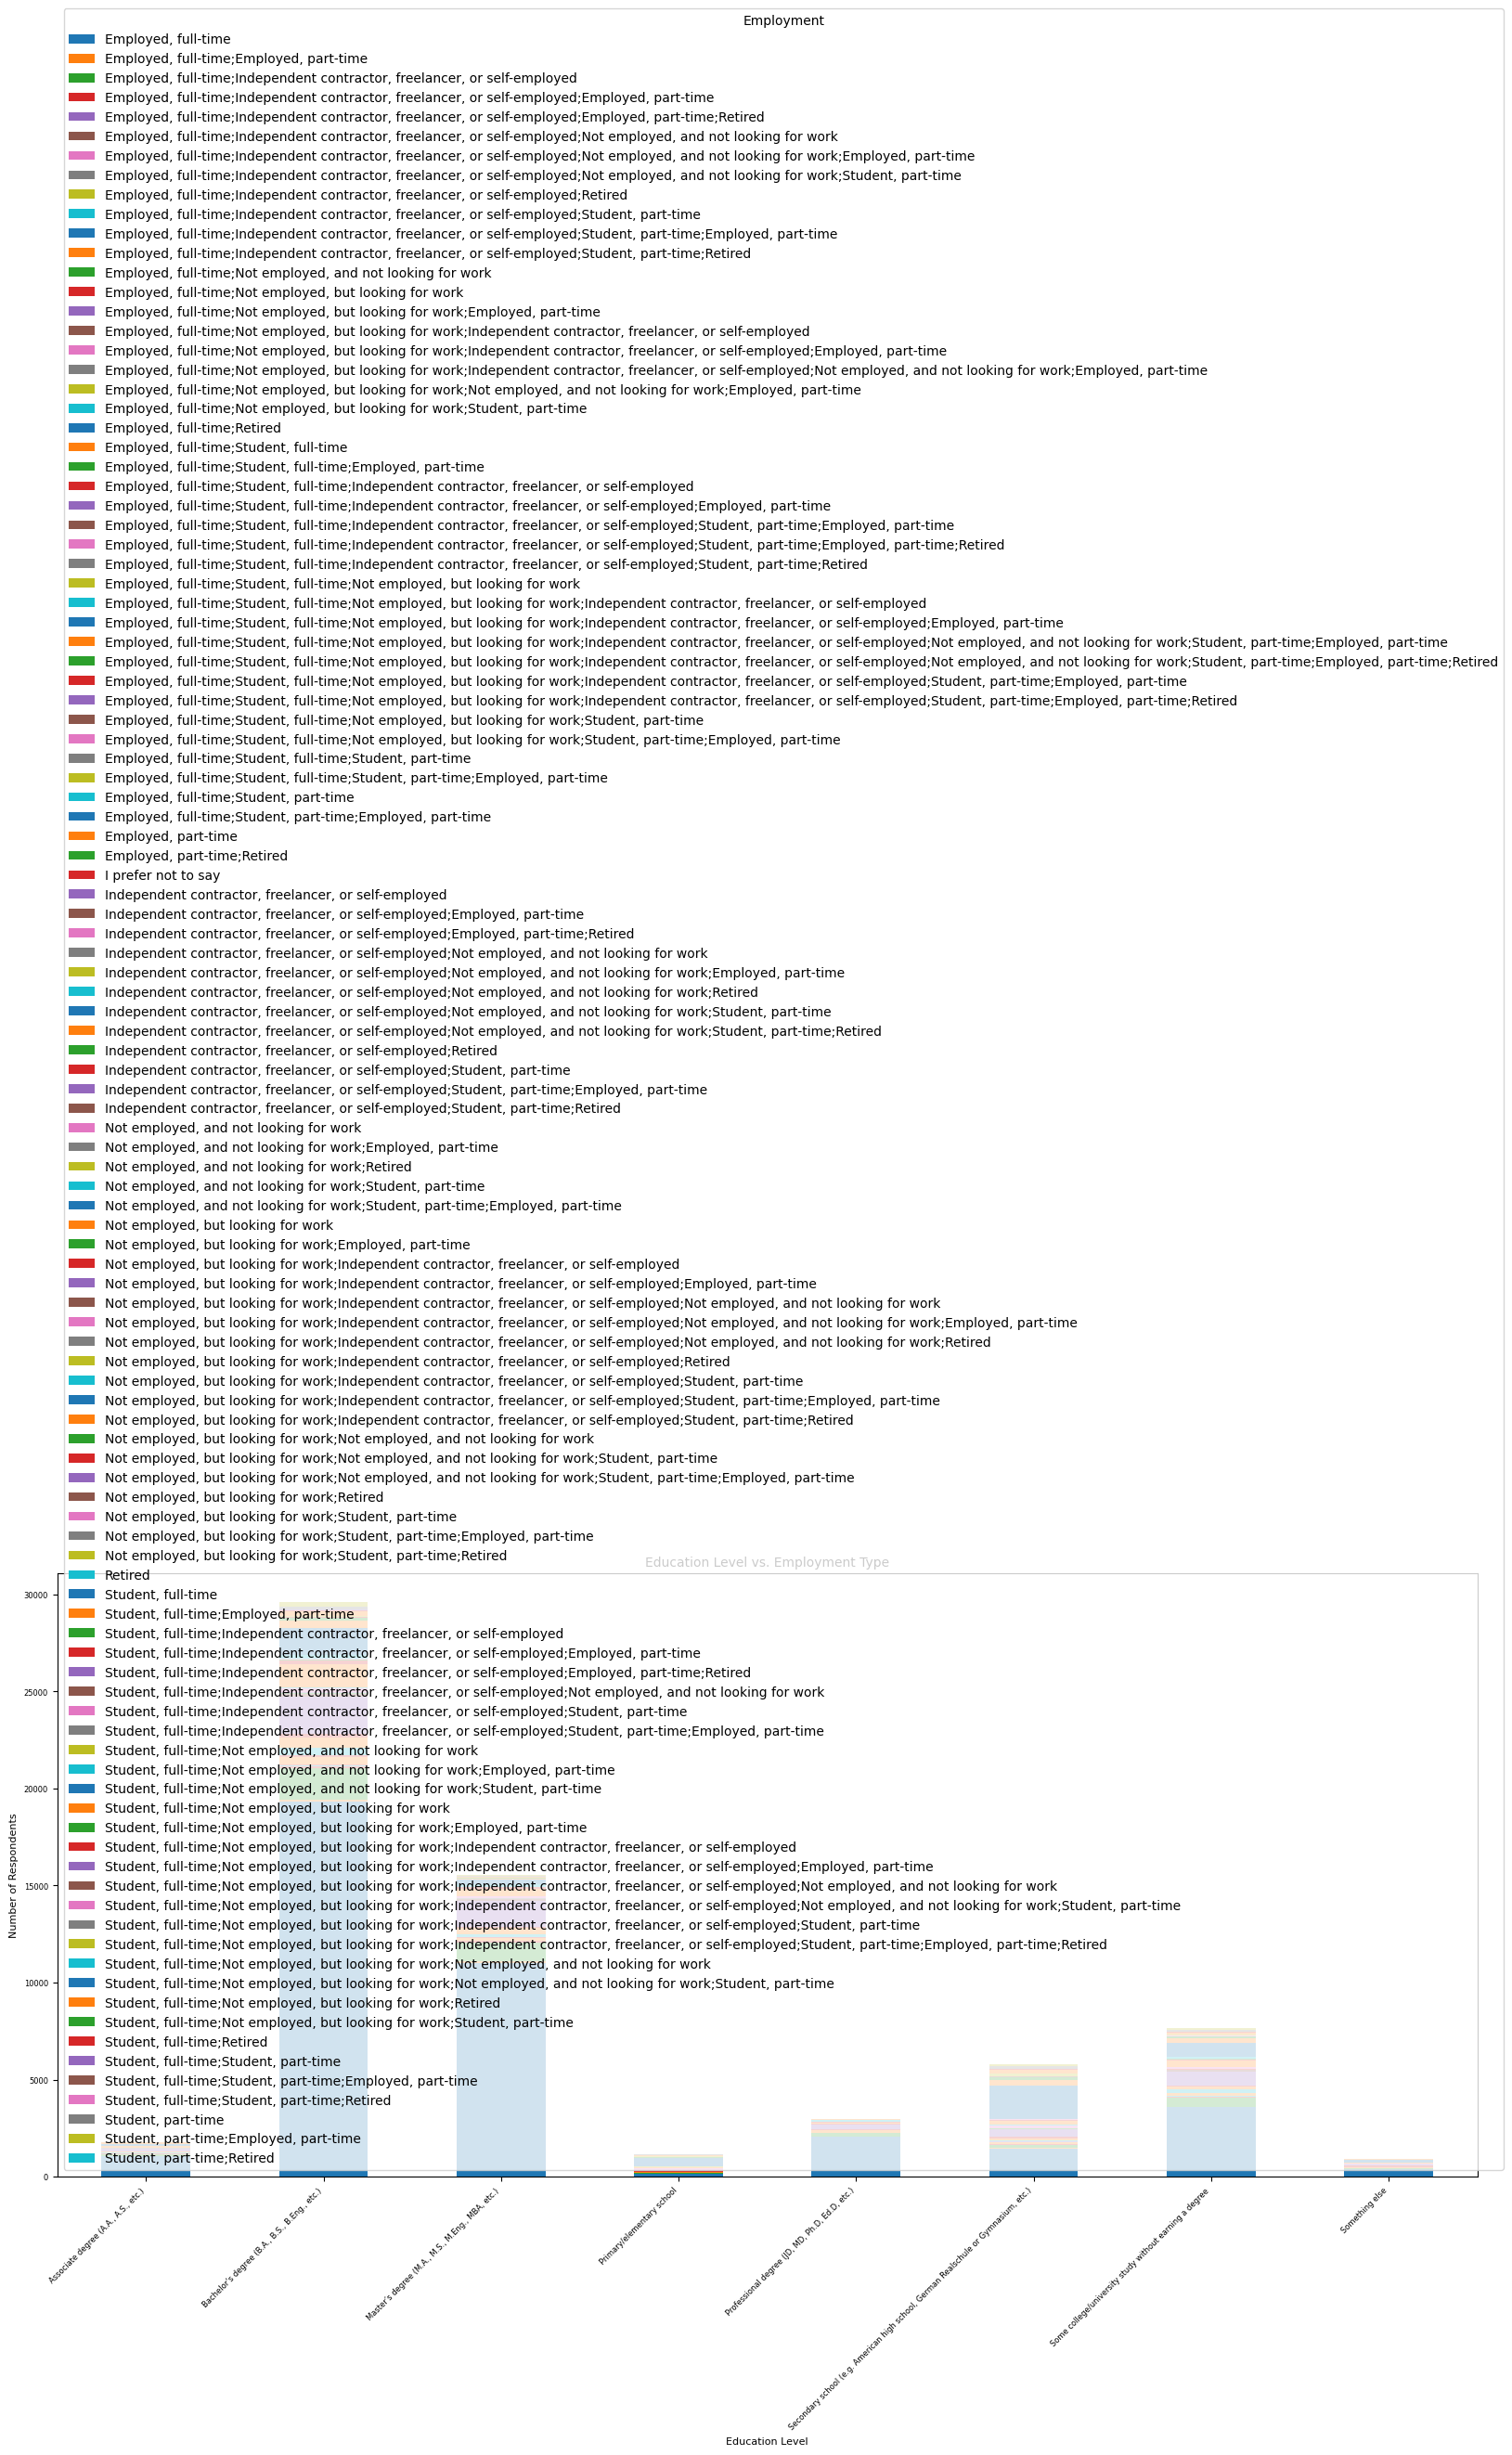

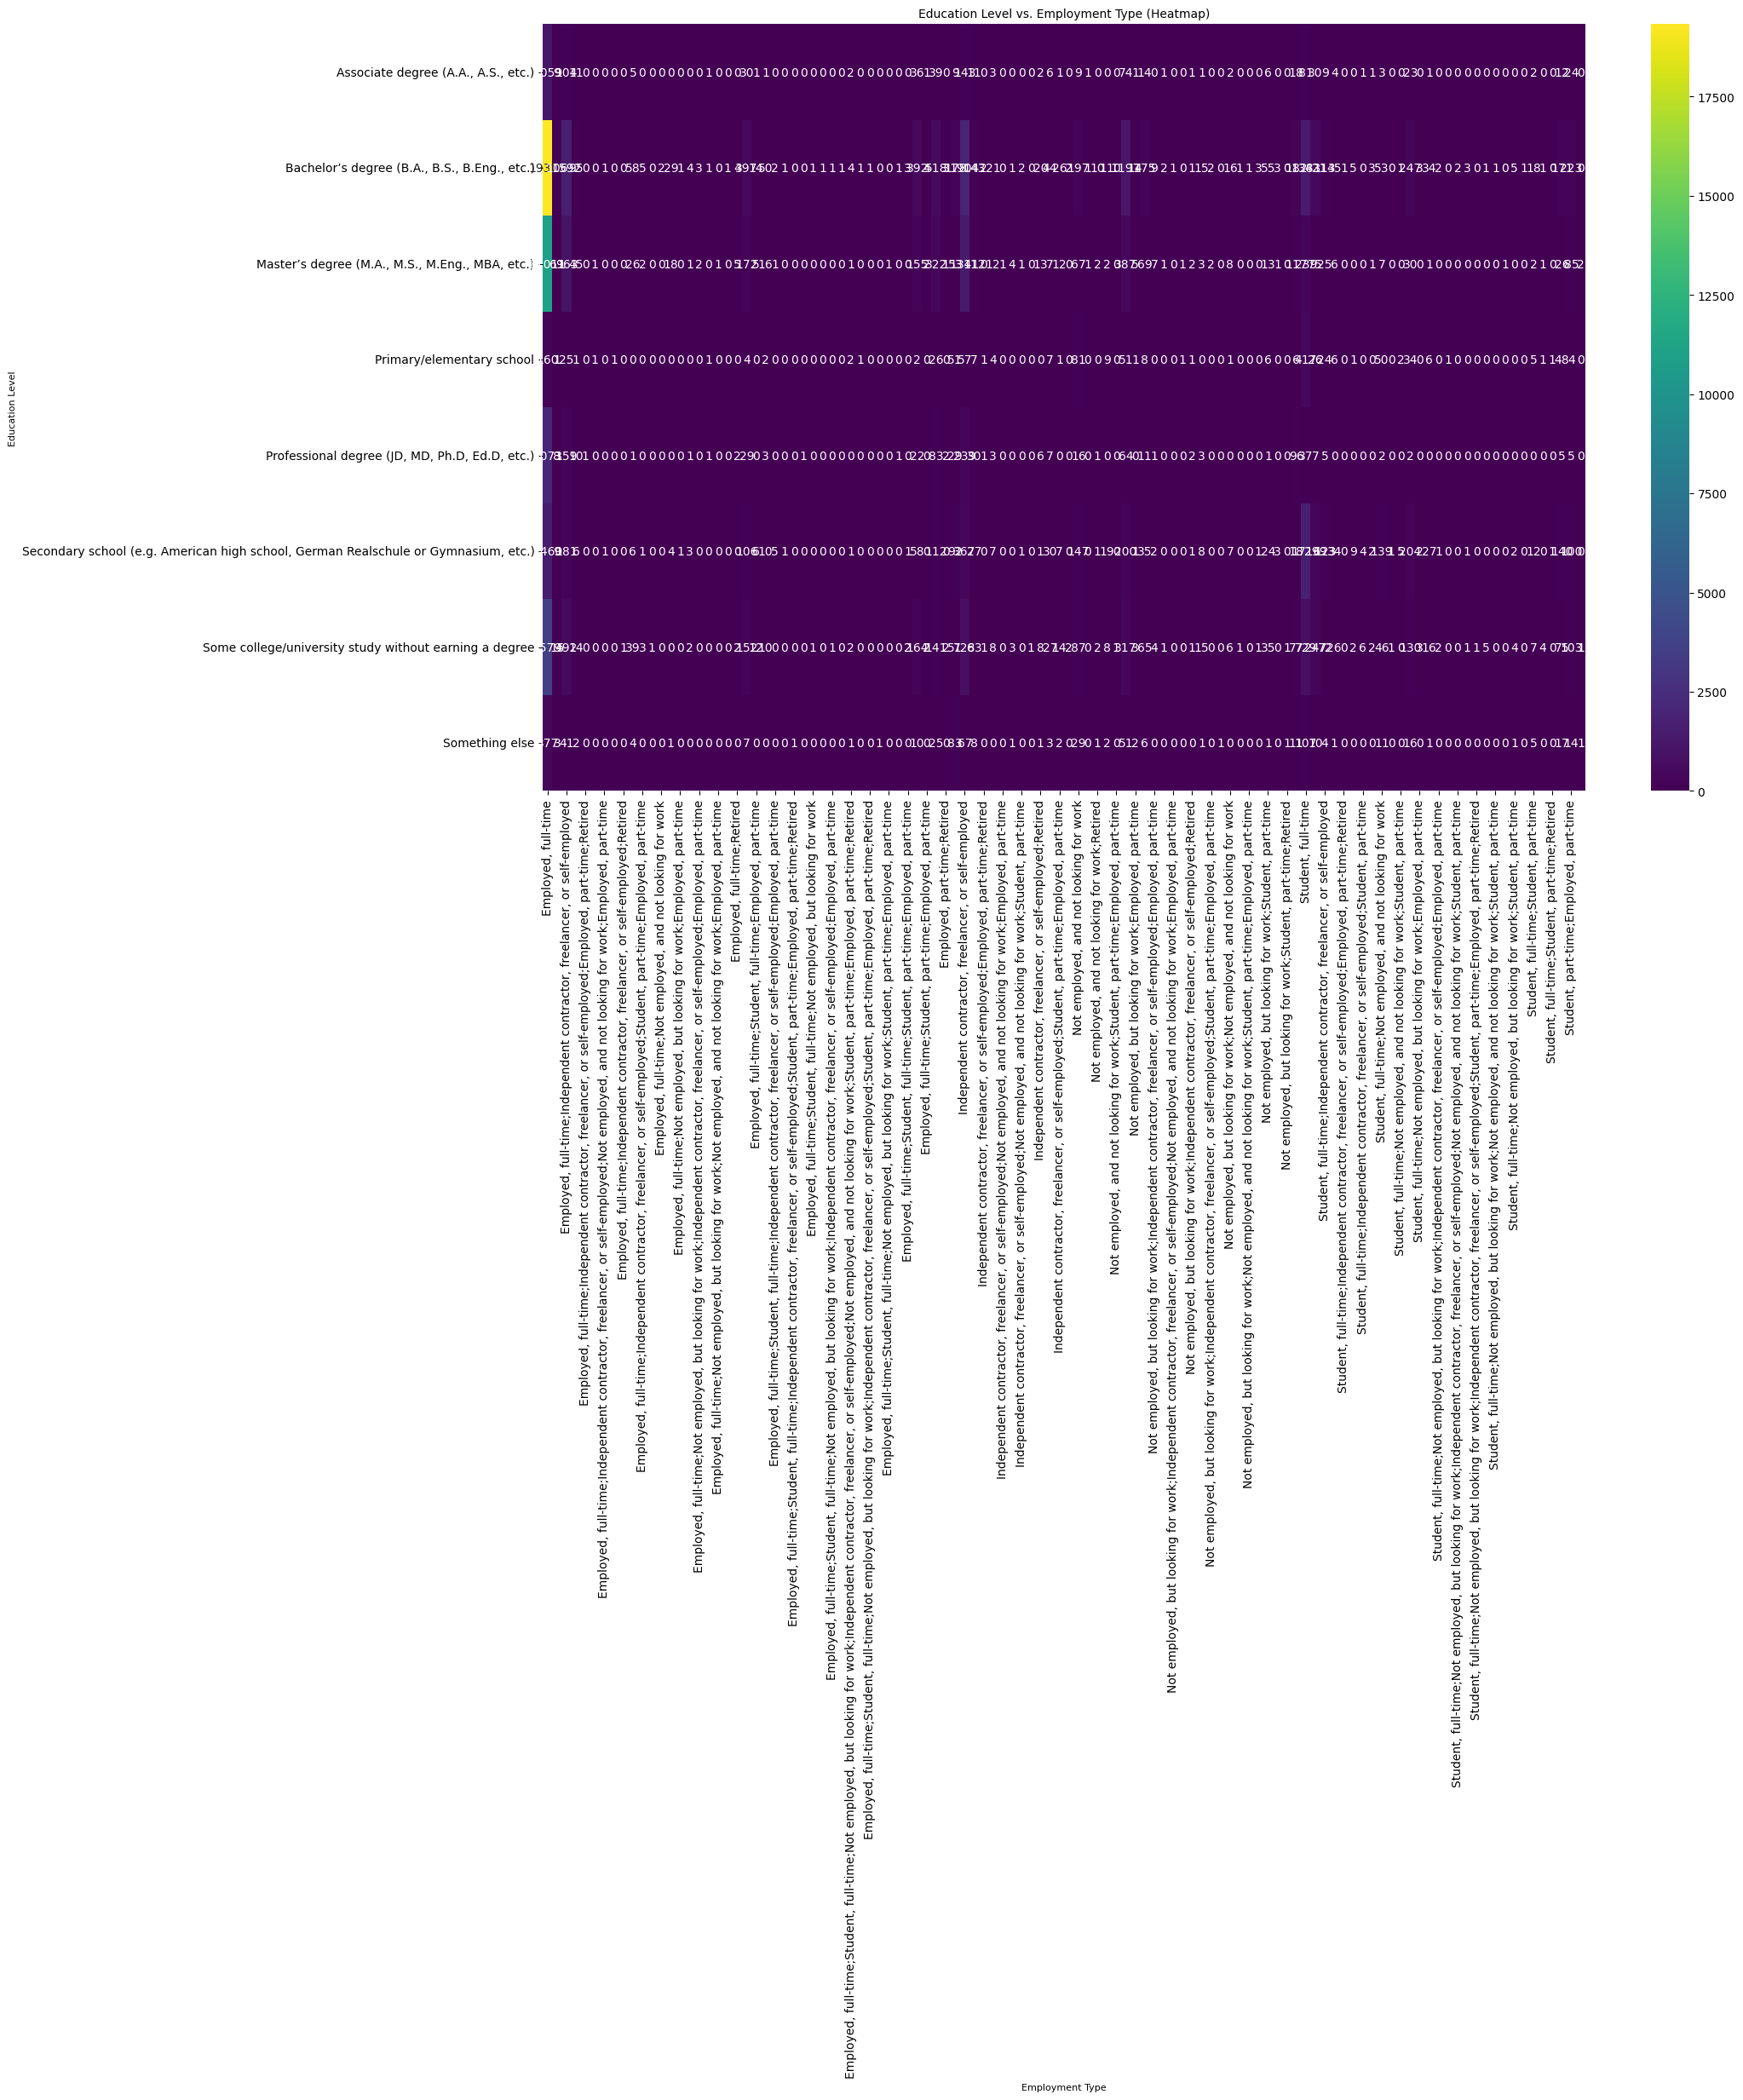

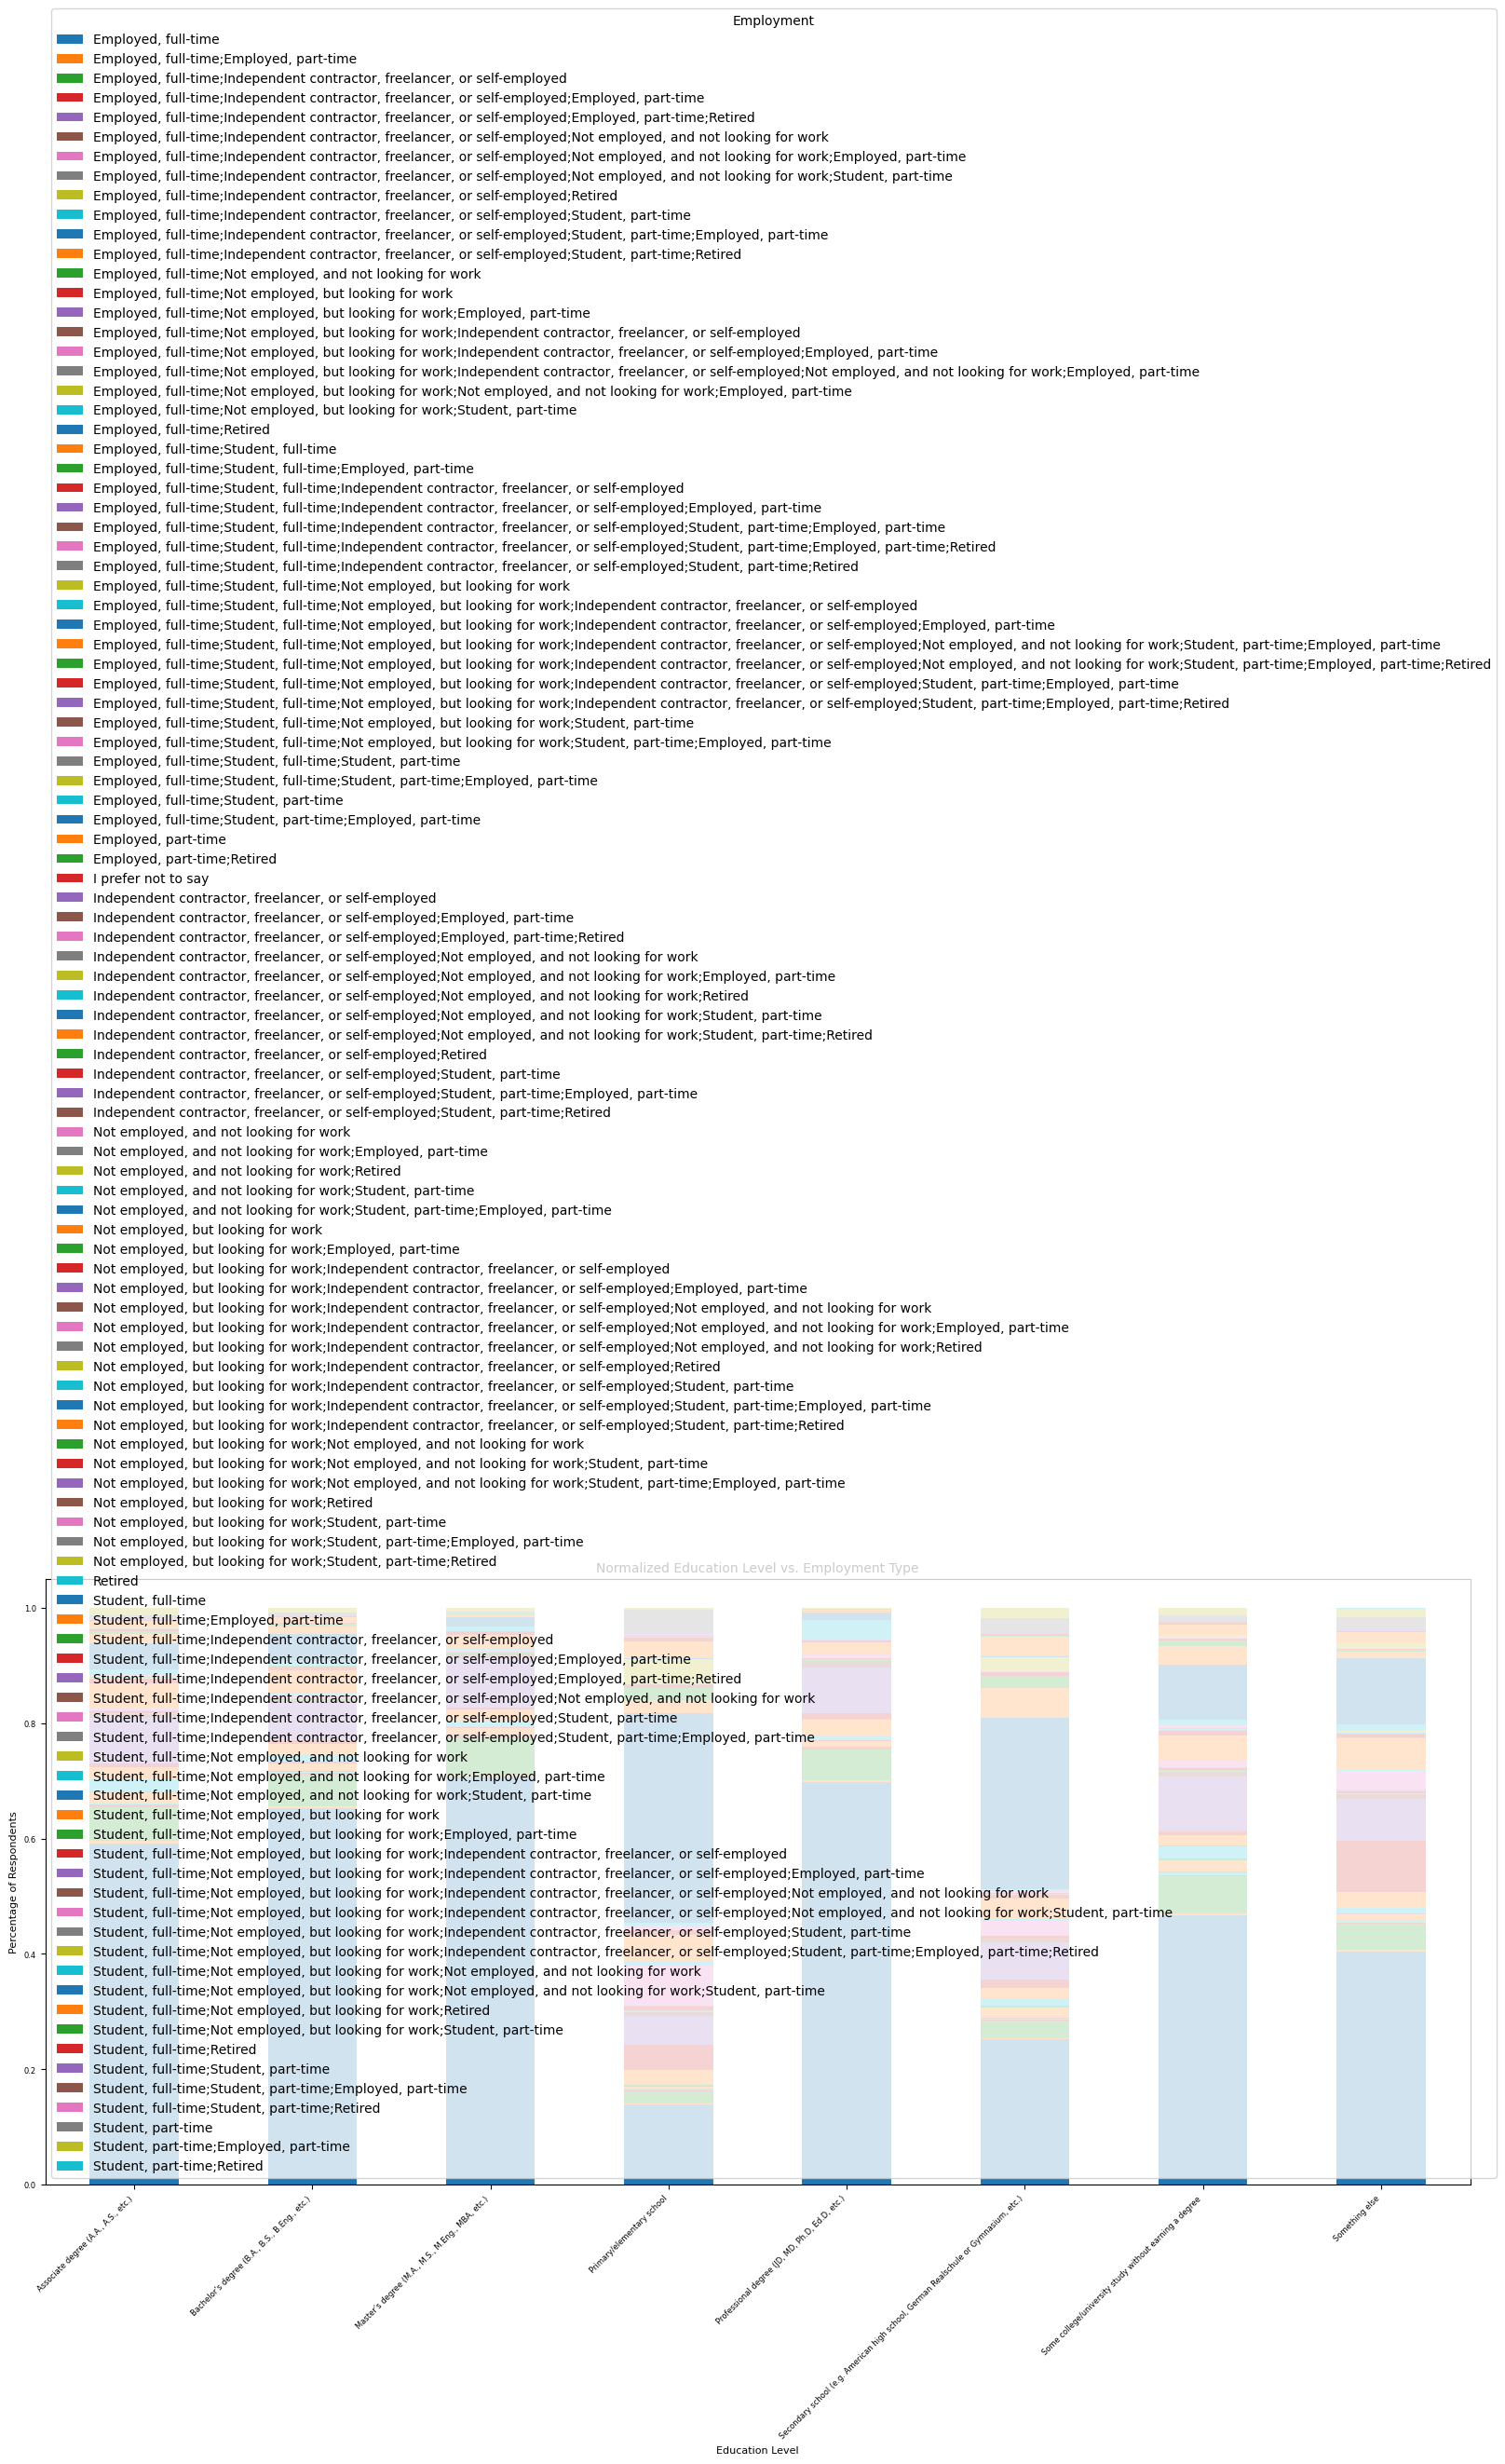

In [23]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Handle missing values (fill with mode)
if 'EdLevel' in df.columns:
    df['EdLevel'] = df['EdLevel'].fillna(df['EdLevel'].mode()[0])
else:
    print("EdLevel column not found.")

if 'Employment' in df.columns:
    df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])
else:
    print("Employment column not found.")

# Cross-tabulation
cross_tab = pd.crosstab(df['EdLevel'], df['Employment'])
print("Cross-tabulation of Education Level vs. Employment Type:\n", cross_tab)

# Visualization (stacked bar plot)
cross_tab.plot(kind='bar', stacked=True, figsize=(18, 10))
plt.title('Education Level vs. Employment Type', fontsize=10)
plt.xlabel('Education Level', fontsize=8)
plt.ylabel('Number of Respondents', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(fontsize=6)
plt.subplots_adjust(bottom=0.25, left=0.1, right=0.95, top=0.9) # Manual margin adjustment
plt.show()

# Visualization (heatmap)
plt.figure(figsize=(18, 12))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
plt.title('Education Level vs. Employment Type (Heatmap)', fontsize=10)
plt.xlabel('Employment Type', fontsize=8)
plt.ylabel('Education Level', fontsize=8)
plt.subplots_adjust(bottom=0.15, left=0.1, right=0.95, top=0.9) # Manual margin adjustment
plt.show()

# Visualization (normalized stacked bar plot)
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)  # Normalize to percentages
cross_tab_norm.plot(kind='bar', stacked=True, figsize=(18, 10))
plt.title('Normalized Education Level vs. Employment Type', fontsize=10)
plt.xlabel('Education Level', fontsize=8)
plt.ylabel('Percentage of Respondents', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(fontsize=6)
plt.subplots_adjust(bottom=0.25, left=0.1, right=0.95, top=0.9) # Manual margin adjustment
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [24]:
## Write your code here

import pandas as pd

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# --- Perform your cleaning and analysis steps here ---

# Example: Handle missing values in 'EdLevel' and 'Employment'
if 'EdLevel' in df.columns:
    df['EdLevel'] = df['EdLevel'].fillna(df['EdLevel'].mode()[0])

if 'Employment' in df.columns:
    df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])

# Example: Convert YearsCodePro to numeric, handle errors, and create experience ranges.
def convert_years_pro(years_str):
    if pd.isna(years_str):
        return None
    elif years_str == 'Less than 1 year':
        return 0
    elif years_str == 'More than 50 years':
        return 50
    else:
        try:
            return float(years_str)
        except ValueError:
            return None

df['YearsCodePro_Numeric'] = df['YearsCodePro'].apply(convert_years_pro)
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 Years', '5-10 Years', '10-20 Years', '>20 Years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro_Numeric'], bins=bins, labels=labels, right=False)

# Example: Map JobSat to numerical values
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSatPoints_1'] = df['JobSat'].map(job_sat_mapping)

# --- End of cleaning and analysis steps ---

# Save the modified dataset to a CSV file
output_file_path = 'cleaned_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")

Cleaned and analyzed dataset saved to: cleaned_survey_data.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
